# Visualize missing values for weather and consumption data

In [2]:
import pandas as pd

# Load the raw consumption data
consumption_path = '../../data/paraguay/electricity-consumption-raw.csv'
df_consumption = pd.read_csv(consumption_path)

In [3]:
# Identify feeder columns (assuming time columns are first, feeders are the rest)
time_cols = [col for col in df_consumption.columns if 'time' in col.lower() or 'date' in col.lower()]
feeder_cols = [col for col in df_consumption.columns if col not in time_cols]

## missing values analysis for consumption data


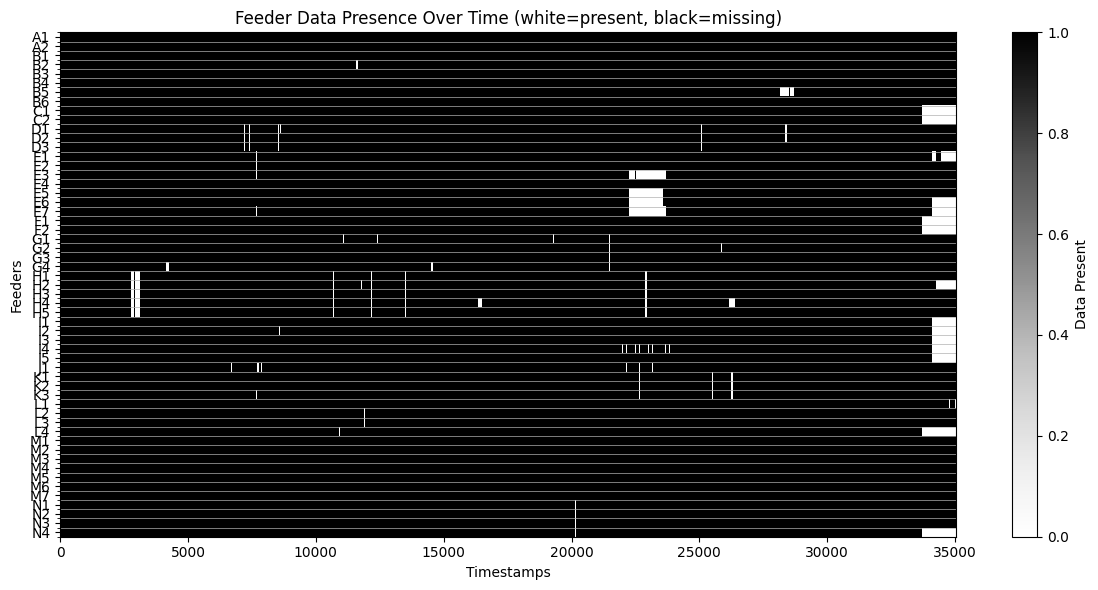

In [4]:
# Visualize feeder coverage over time
import matplotlib.pyplot as plt
import numpy as np

if 'feeder' in df_consumption.columns and time_cols:
    feeder_col = 'feeder'
    time_col = time_cols[0]
    presence = df_consumption.pivot(index=time_col, columns=feeder_col, values=feeder_col).notna()
    plt.figure(figsize=(12, 6))
    plt.imshow(presence.T, aspect='auto', interpolation='none', cmap='Greys')
    plt.xlabel('Timestamps')
    plt.ylabel('Feeders')
    plt.title('Feeder Data Presence Over Time (white=present, black=missing)')
    # Increase space between feeder names on y-axis
    plt.yticks(np.arange(len(presence.columns)), presence.columns, fontsize=10)
    plt.gca().set_yticks(np.arange(-0.5, len(presence.columns), 1), minor=True)
    plt.gca().yaxis.grid(True, which='minor', linestyle='-', linewidth=0.5)
    plt.colorbar(label='Data Present')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found for this plot.")

## Missing values for weather data

In [5]:
import pandas as pd

# Load the meteorological raw data
weather_path = '../../data/paraguay/meteorological-raw.csv'
df_weather = pd.read_csv(weather_path)

# Show missing values per column
missing_weather = df_weather.isnull().sum()
missing_weather = missing_weather[missing_weather > 0]

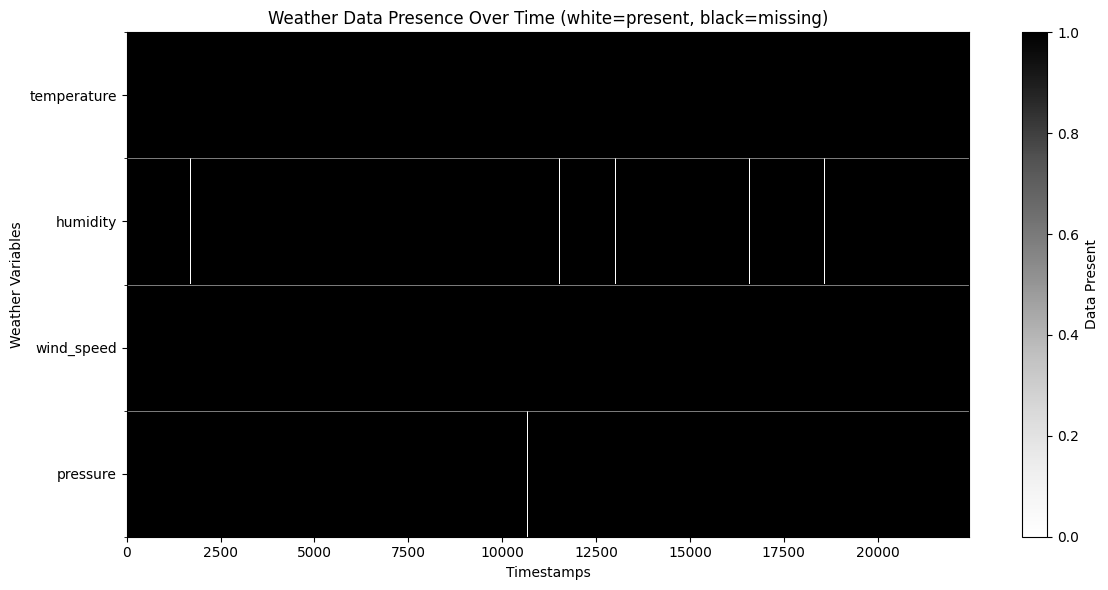

In [10]:
# Visualize weather variable coverage over time
import matplotlib.pyplot as plt
import numpy as np

# Assume the first column is time, rest are weather variables
time_col = df_weather.columns[0]
weather_cols = df_weather.columns[1:]

presence_weather = df_weather[weather_cols].notna()

plt.figure(figsize=(12, 6))
plt.imshow(presence_weather.T, aspect='auto', interpolation='none', cmap='Greys')
plt.xlabel('Timestamps')
plt.ylabel('Weather Variables')
plt.title('Weather Data Presence Over Time (white=present, black=missing)')
plt.yticks(np.arange(len(weather_cols)), weather_cols, fontsize=10)
plt.gca().set_yticks(np.arange(-0.5, len(weather_cols), 1), minor=True)
plt.gca().yaxis.grid(True, which='minor', linestyle='-', linewidth=0.5)
plt.colorbar(label='Data Present')
plt.tight_layout()
plt.show()